In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
import seaborn as sns
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Choix de la donnée
Insérer le matricule pour fixer le dataset.

In [ ]:
matricule =2200024 #Insérer le numéro/matricule de la carte d'étudiant
dataframe = data.sample(220, random_state = matricule)
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
36250,0.41,Ideal,E,VS2,62.1,57.0,935,4.74,4.79,2.96
39520,0.51,Premium,J,VS2,61.9,61.0,1080,5.12,5.09,3.16
32277,0.36,Ideal,F,VS1,60.1,57.0,789,4.62,4.67,2.79
37175,0.32,Ideal,D,VS2,61.6,56.0,972,4.40,4.37,2.70
51262,0.70,Premium,D,SI1,58.8,59.0,2357,5.86,5.84,3.44


In [ ]:
input_cols = ["carat", "depth", "table"]
input1_cols = ["carat", "depth"]
input2_cols=["carat","depth","table","x","y","z"]
categorical_cols = ["color", "clarity"]
output_cols = ["price"]

In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
        color_array = dataframe1["color"].to_numpy()
        clarity_array = dataframe1["clarity"].to_numpy()
        depth_array = dataframe1[['depth']].to_numpy()
        carrat_array = dataframe1[['carat']].to_numpy()
        inputs_array = dataframe1[input_cols].to_numpy()
        targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array, carrat_array, depth_array, color_array, clarity_array

inputs_array, targets_array, carrat_array, depth_array, color_array, clarity_array  = dataframe_to_arrays(dataframe)
inputs_array[:3], targets_array[:3]

(array([[ 0.41, 62.1 , 57.  ],
        [ 0.51, 61.9 , 61.  ],
        [ 0.36, 60.1 , 57.  ]]),
 array([[ 935],
        [1080],
        [ 789]]))

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy import stats
from torch.utils.data import DataLoader, TensorDataset, random_split
from mpl_toolkits.mplot3d import Axes3D



###**I  Analyse statistique descriptive et inference**

Tout d'abord , on a commencé avec une visualisation des différents variables






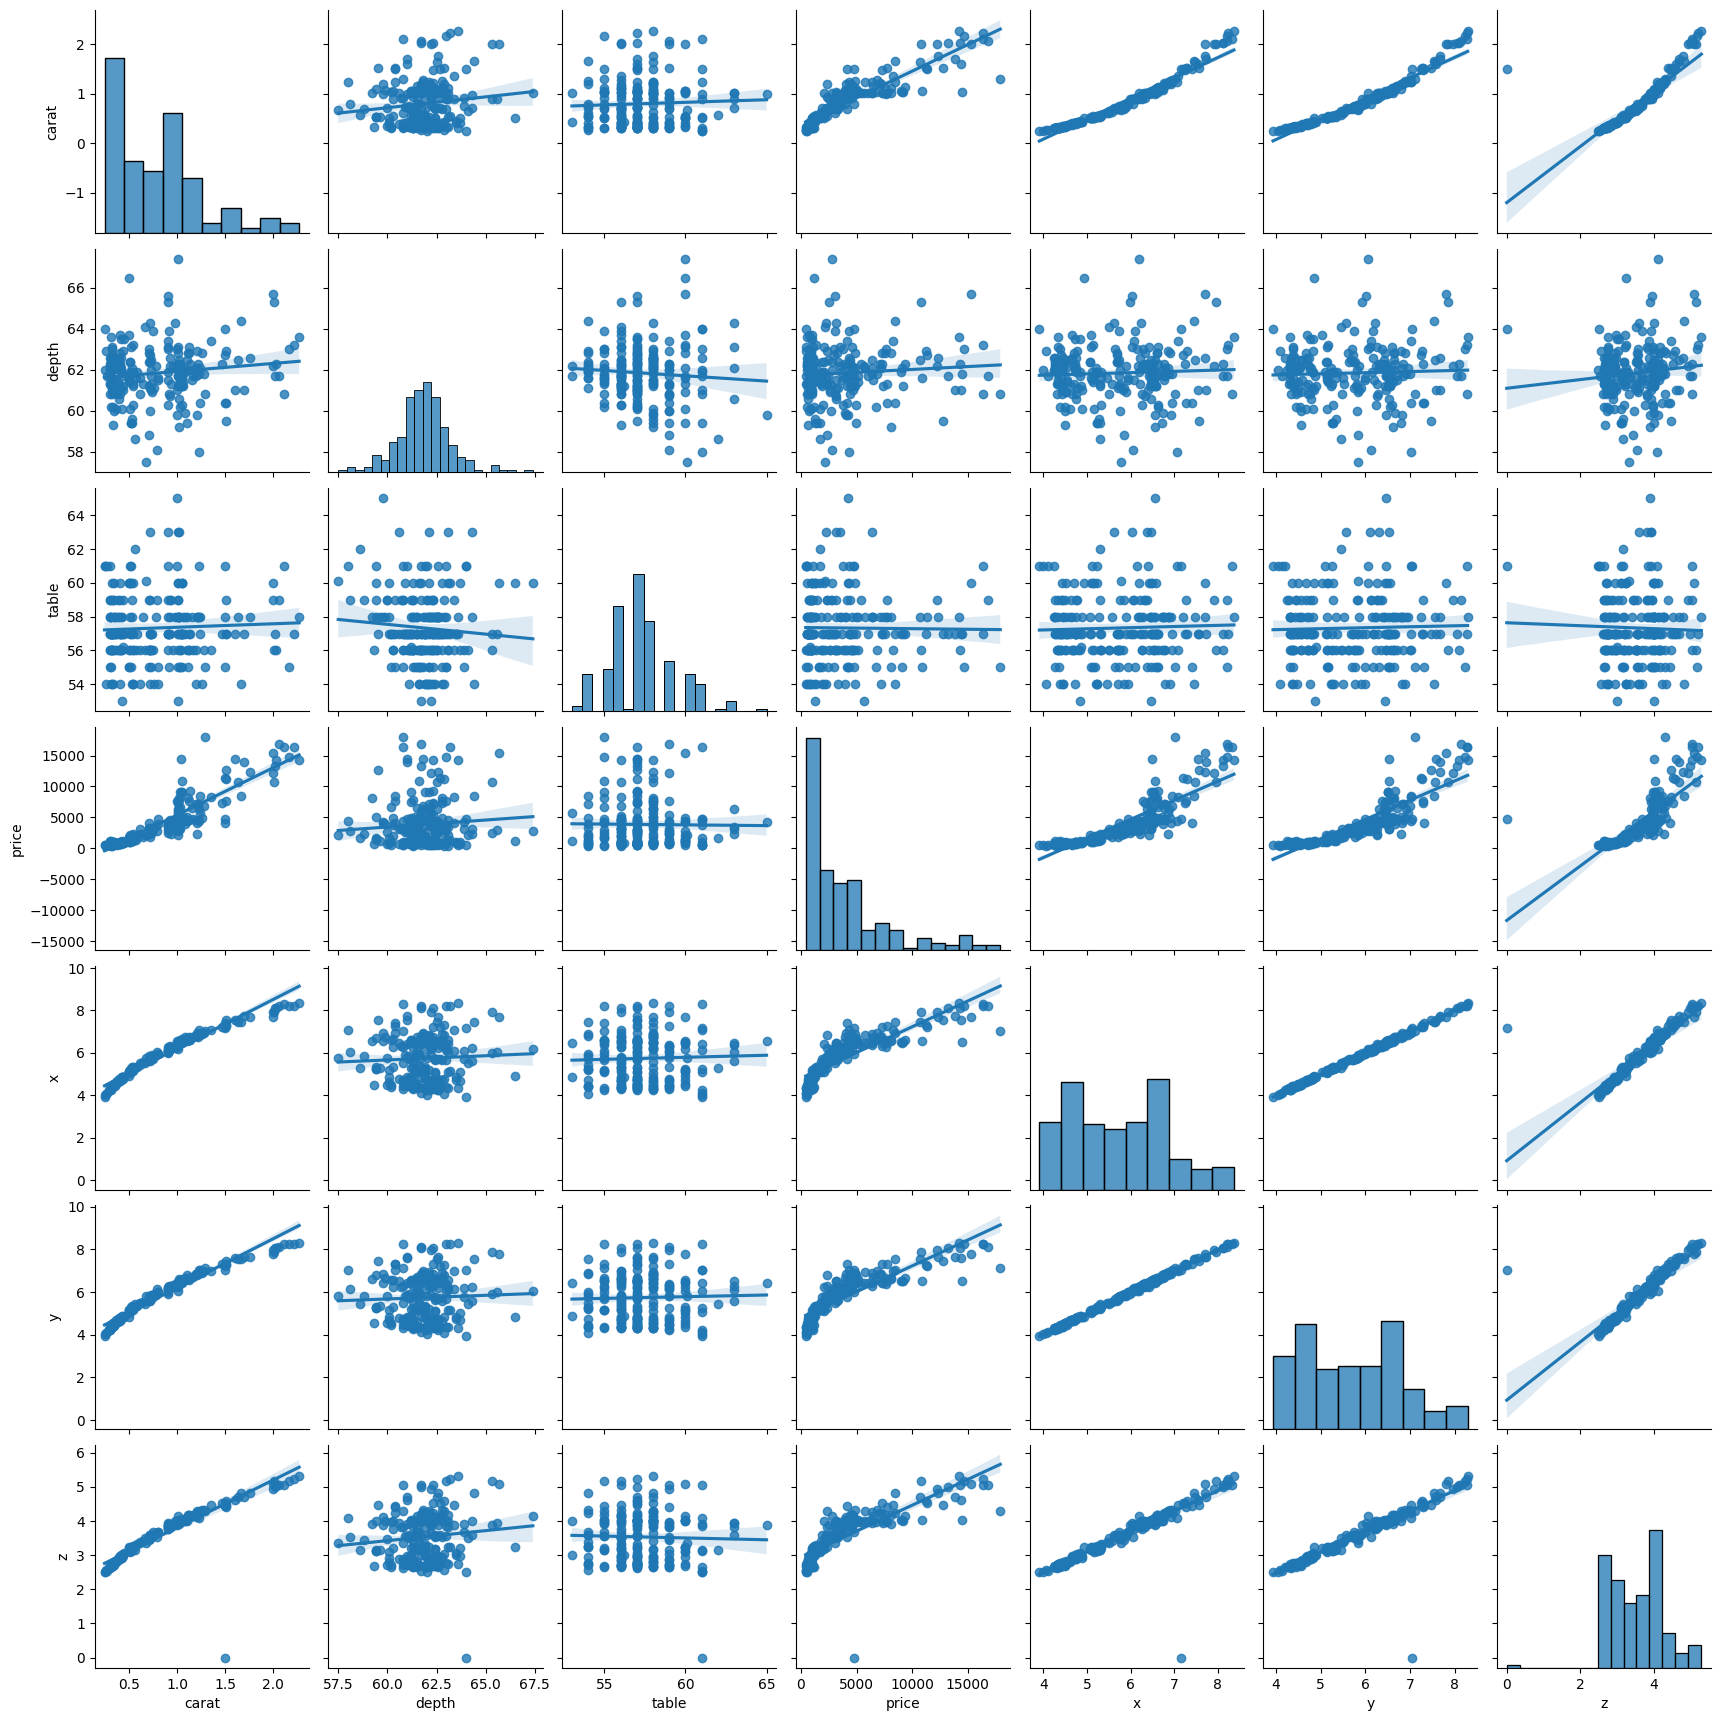

In [ ]:

sns.pairplot(dataframe, kind="reg")
plt.show()


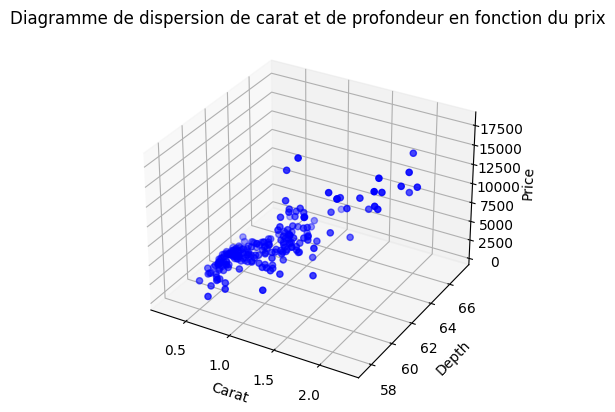

In [ ]:
price = dataframe['price']
carat = dataframe['carat']
depth = dataframe['depth']


fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
scatter = ax.scatter(carat, depth, price, c='blue', marker='o')
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
ax.set_title('Diagramme de dispersion de carat et de profondeur en fonction du prix')

plt.show()

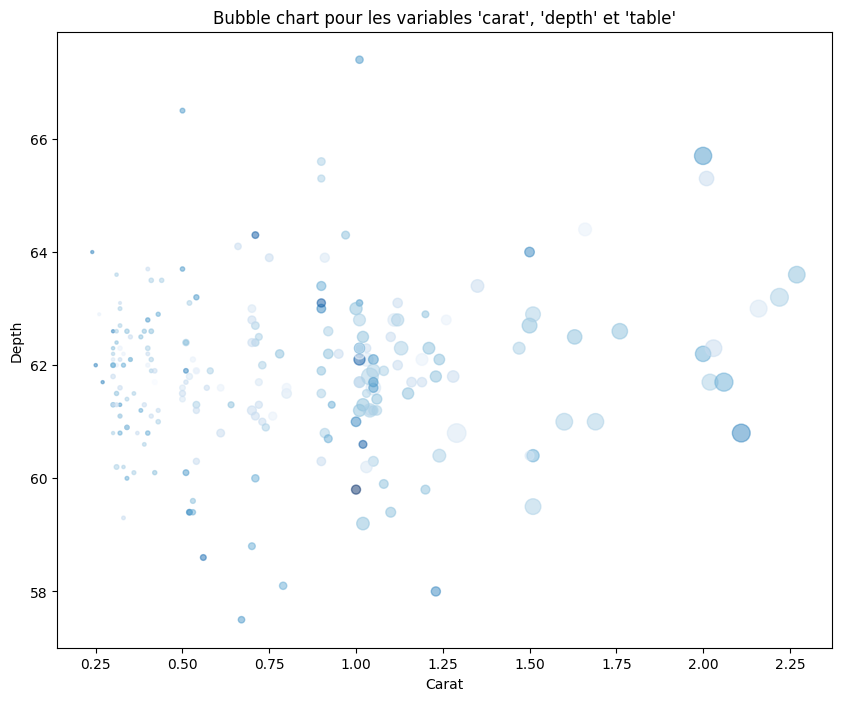

In [ ]:
input_cols = ["carat", "depth", "table"]
data = dataframe[input_cols]
sizes = dataframe["price"] / 100

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x=data["carat"], y=data["depth"], s=sizes, c=data["table"], alpha=0.5, cmap="Blues")
ax.set_xlabel("Carat")
ax.set_ylabel("Depth")
ax.set_title("Bubble chart pour les variables 'carat', 'depth' et 'table'")
plt.show()

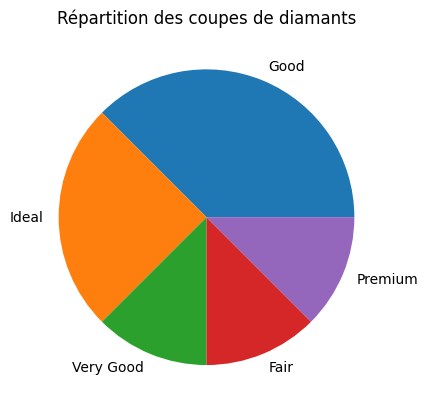

In [ ]:
data = pd.DataFrame({"cut": ["Ideal", "Good", "Very Good", "Fair", "Premium", "Ideal", "Good", "Good"]})
counts = data["cut"].value_counts()
plt.pie(counts.values, labels=counts.index)
plt.title("Répartition des coupes de diamants")
plt.show()

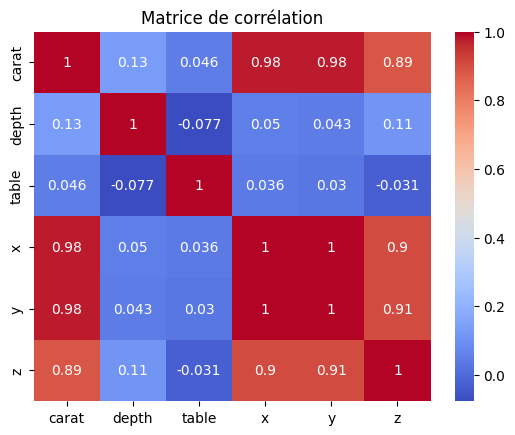

In [ ]:

corr_matrix = dataframe[input2_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

**Interprétation :**

La matrice de corrélation fournit des informations sur les relations entre les variables étudiées, qui sont le prix, le poids en carat, les dimensions (x, y, z), la profondeur et la table des diamants.

Les valeurs diagonales de la matrice sont toutes égales à 1, car chaque variable est parfaitement corrélée avec elle-même.

En examinant les autres éléments de la matrice, on peut observer que le prix des diamants est fortement corrélé avec le poids en carat, la longueur et la profondeur de la pierre (avec des corrélations proches de 0,98 pour chaque variable). Cela suggère que ces caractéristiques ont une forte influence sur le prix des diamants, avec une augmentation de ces valeurs entraînant une augmentation du prix.

La qualité de la coupe des diamants est également un facteur important dans la détermination du prix. La variable "y", qui représente la profondeur de la partie supérieure de la pierre, est positivement corrélée avec le prix (0,89), ce qui signifie que les diamants ayant une profondeur plus petite ont tendance à être plus chers. La variable "table", qui représente la taille de la partie supérieure de la pierre, a une corrélation négative légère avec le prix (-0,077), indiquant que les diamants avec une plus grande table ont tendance à être un peu moins chers.

En outre, la corrélation négative entre "table" et "carat" (-0,4) suggère que les diamants avec un poids plus important ont tendance à avoir une table plus petite. Enfin, la corrélation négative entre "profondeur" et "table" (-0,6) indique que les diamants avec une profondeur plus importante ont tendance à avoir une table plus petite.

En résumé, cette matrice de corrélation montre que le prix des diamants dépend fortement de leur poids en carat, de leurs dimensions (en particulier de la longueur et de la profondeur), ainsi que de la qualité de la coupe, représentée par les variables "y" et "table". La profondeur a une influence relativement faible sur le prix.



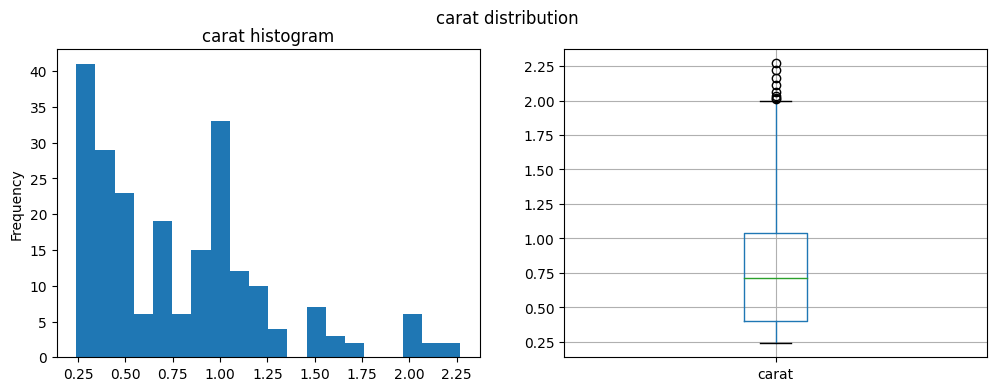

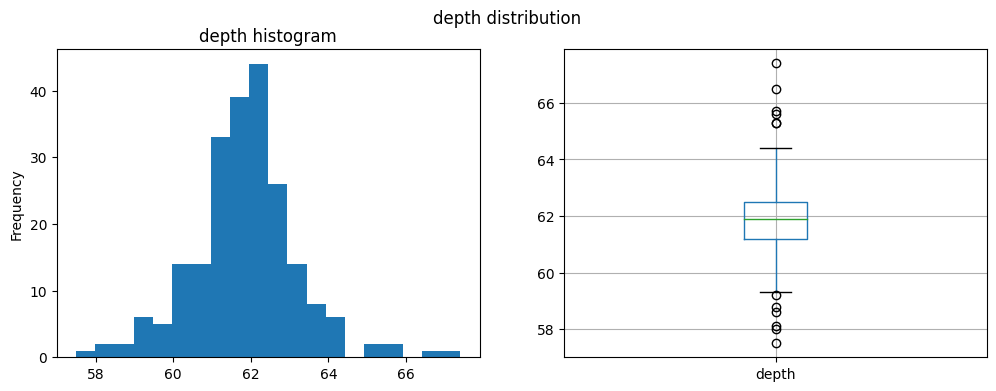

In [ ]:
#Representation des inputs (carat/depth)

for i, col in enumerate(input1_cols):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    dataframe[col].plot(kind='hist', bins=20, ax=axes[0], title=f"{col} histogram")

    dataframe[[col]].boxplot(ax=axes[1])
    plt.suptitle(f"{col} distribution")


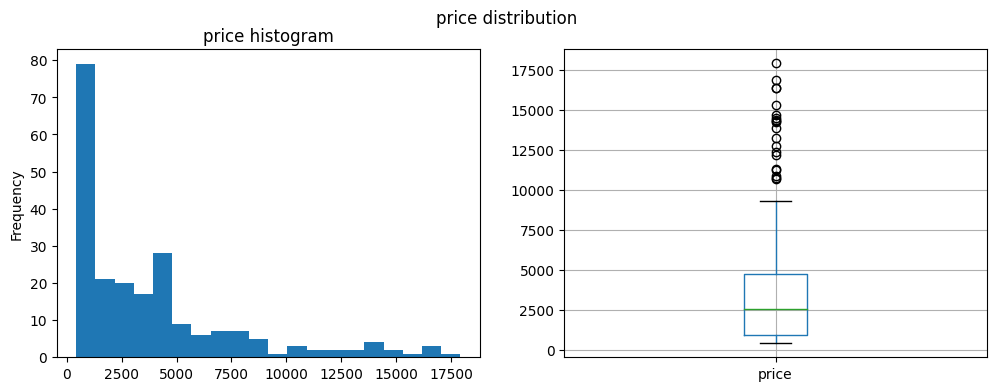

In [ ]:
#Representation de l'output (price)

for i, col in enumerate(output_cols):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    dataframe[col].plot(kind='hist', bins=20, ax=axes[0], title=f"{col} histogram")

    dataframe[[col]].boxplot(ax=axes[1])
    plt.suptitle(f"{col} distribution")

In [ ]:
#Tableau de statistiques descriptives

from tabulate import tabulate
df_sub=dataframe[['price','carat','depth']]
df_sub_stats=df_sub.describe()
dfstd=df_sub.std()
n=len(df_sub)
errtype=dfstd/(n**0.5)
interconf=errtype*1.96
df_sub_stats.loc['ecart type']=dfstd
df_sub_stats.loc['erreur type']=errtype
df_sub_stats.loc['interval de confiance standard']=interconf

print(tabulate(df_sub_stats, headers='keys', tablefmt='pipe',showindex=True))

|                                |     price |       carat |       depth |
|:-------------------------------|----------:|------------:|------------:|
| count                          |   220     | 220         | 220         |
| mean                           |  3862.64  |   0.797818  |  61.8459    |
| std                            |  3884.37  |   0.459889  |   1.36727   |
| min                            |   421     |   0.24      |  57.5       |
| 25%                            |   939.75  |   0.4       |  61.2       |
| 50%                            |  2593.5   |   0.71      |  61.9       |
| 75%                            |  4766.5   |   1.0425    |  62.5       |
| max                            | 17932     |   2.27      |  67.4       |
| ecart type                     |  3884.37  |   0.459889  |   1.36727   |
| erreur type                    |   261.884 |   0.0310057 |   0.0921815 |
| interval de confiance standard |   513.293 |   0.0607711 |   0.180676  |


Interprétations :         
-La distribution des prix des diamants dans l'échantillon est biaisée vers la droite (skewness positive), avec un écart important entre le prix médian (2593,5 dollars) et la moyenne (3862,64 dollars), indiquant une forte présence de valeurs aberrantes dans la distribution.


-Il existe une corrélation positive entre le poids des diamants (carat) et le prix, ce qui suggère que plus le diamant est lourd, plus son prix sera élevé.

-La profondeur des diamants ne semble pas être un indicateur fiable du prix, car il n'y a pas de corrélation évidente entre la profondeur et le prix des diamants.

##**I I Descente du gradient**


In [ ]:
#Erreur quadratique moyenne :
loss_fn = nn.MSELoss()

In [ ]:
#Erreur absolue moyenne :
loss_fn = nn.L1Loss()

In [ ]:
#Fonction d'erreur logarithmique :
def log_loss(y_pred, y_true):
  return F.binary_cross_entropy_with_logits(y_pred, y_true)

In [ ]:
# Normalisation des tableaux carrat_array et depth_array
carrat_array_norm = (carrat_array - np.mean(carrat_array)) / np.std(carrat_array)
depth_array_norm = (depth_array - np.mean(depth_array)) / np.std(depth_array)

# Empilement des tableaux normalisés dans un seul tableau
m = np.column_stack((carrat_array_norm,depth_array_norm))


# Division de m et targets_array en ensembles de données d'apprentissage et de test
m_train, m_test, y_train, y_test = train_test_split(m, targets_array, test_size=1./3, random_state=1)


carrat_train = m_train[:,0]
carrat_test = m_test[:,1]
depth_test = m_test[:,0]

# Normalisation de X et Y

X = np.column_stack((carrat_array,depth_array))
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
Y_norm = (targets_array - np.mean(targets_array)) / np.std(targets_array)


X_norm = torch.tensor(X_norm,dtype=torch.float32)
Y_norm = torch.tensor(Y_norm,dtype=torch.float32)


# Division de X_norm et Y_norm en ensembles de données d'apprentissage et de test

X_train, X_test, y_train, y_test = train_test_split(X_norm, Y_norm, test_size=1./3, random_state=1)

#Création d'un objet TensorDataset pour l'ensemble de données d'apprentissage

train_ds = TensorDataset(X_train, y_train)
y_tr = y_train.reshape((146,1))
train_ds = TensorDataset(X_train, y_train)

# Définition de la taille de lot (batch_size) et création d'un objet DataLoader pour l'ensemble de données d'apprentissage
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

# Définition d'une classe perceptron qui étend la classe Module de PyTorch

class perceptron(torch.nn.Module):
    def __init__(self):
        super(perceptron, self).__init__()
        self.linear = torch.nn.Linear(2, 1)

    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        return x


# definir  MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

learning_rate = 0.01
num_epochs = 200
log_epochs = 10

# creation d'une instance du modèle
model = perceptron()

# definition de l'optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Entrainement du modèle
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:

    optimizer.zero_grad()
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch.unsqueeze(1))
    loss.backward()


    grad_w1 = model.linear.weight.grad[0][0]
    grad_w2 = model.linear.weight.grad[0][1]
    grad_w3 = model.linear.bias.grad


    optimizer.step()

#Affichage

print(f"Final  Loss: {loss.item():.4f}, Gradient de w1: {grad_w1.item():.4f},Gradient de w2 {grad_w2.item():.4f},Gradient de w3 {grad_w3.item():.4f}")


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Final  Loss: 0.0484, Gradient de w1: -0.0021,Gradient de w2 -0.0039,Gradient de w3 0.0051


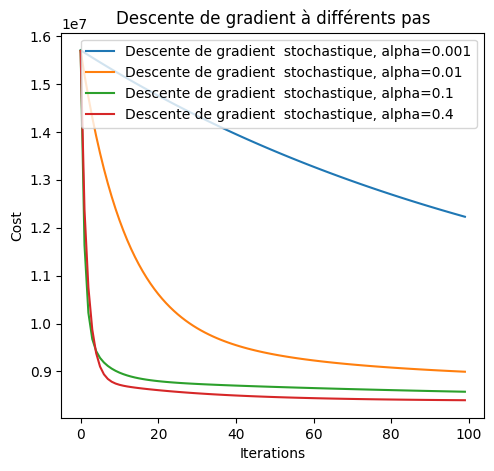

In [ ]:

# Prétraitement des données
# Encoder les variables catégorielles

data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])

# Diviser les données en variables d'entrée et de sortie
X = data.drop(['price'], axis=1).values
Y = data['price'].values.reshape(-1, 1)

# Normalisation des variables d'entrée
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Conversion des tableaux numpy en tenseurs PyTorch
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

def MSE_function(X, Y, w):
    pred = torch.matmul(X,w)
    errors = pred-Y
    cost = torch.sum(errors ** 2) / (2*len(X))
    gradients = torch.matmul(torch.transpose(X,0,1), errors) / len(X)
    return cost, gradients

def gradient_descent(X, Y, learning_rate, num_iterations):
    w = torch.randn(X.shape[1], 1)
    costs = []
    for i in range(num_iterations):
        cost, gradients = MSE_function(X,Y,w)
        w -= learning_rate*gradients
        costs.append(cost)
    return w, costs

# Test de plusieurs taux d'apprentissage

learning_rates = [0.001, 0.01, 0.1, 0.4]
num_iterations = 100
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
for j in learning_rates:
    weights, costs = gradient_descent(X, Y, j, num_iterations)
    ax.plot(costs, label='Descente de gradient  stochastique, alpha='+str(j))

ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Descente de gradient à différents pas")

plt.legend()
plt.show()

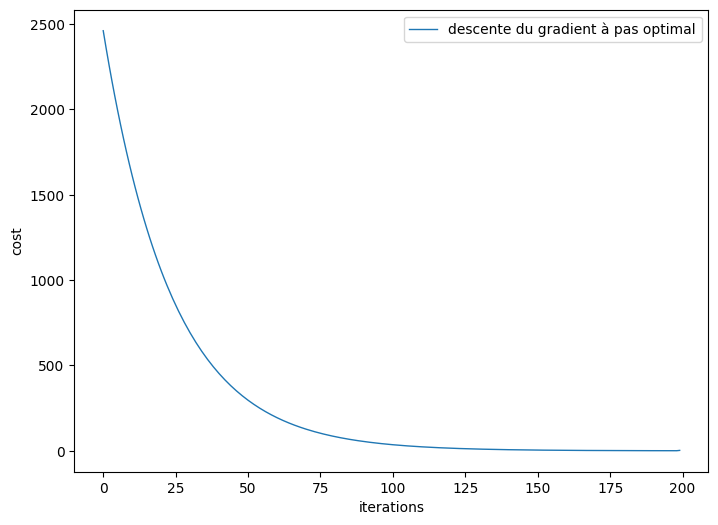

In [ ]:
def optimal_step_descent(X, Y, num_iterations):
    w = torch.randn(X.shape[1], 1)
    costs = []
    for i in range(num_iterations):
        alpha = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(X, 0, 1), X)), torch.transpose(X, 0, 1)), Y)
        cost, gradients = MSE_function(X, Y, w)
        w -= alpha * gradients
        costs.insert(0, cost.item())
    return w, costs

fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1, 2, 1)
weights3, costs3 = optimal_step_descent(X_train, y_tr, 200)

ax1.set_xlabel("iterations")
ax1.set_ylabel("cost")
ax1.plot(costs3, lw=1, label="descente du gradient à pas optimal")
ax1.legend()

plt.show()


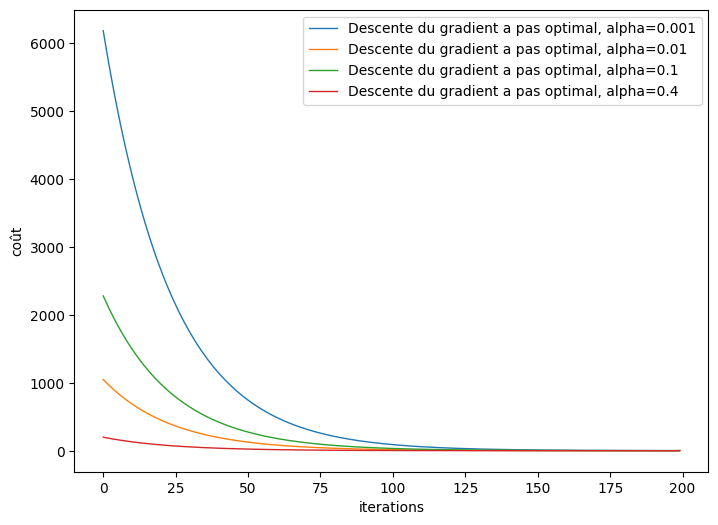

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1, 2, 1)

alphas = [0.001, 0.01, 0.1, 0.4]
for alpha in alphas:
    weights, costs = optimal_step_descent(X_train, y_tr,200)
    ax1.plot(costs, lw=1, label=f"Descente du gradient a pas optimal, alpha={alpha}")

ax1.set_xlabel("iterations")
ax1.set_ylabel("coût")
ax1.legend()
ax.set_title("Descente de gradient à pas optimal à différents pas")
plt.show()



La méthode de descente à pas optimal peut être plus lente que la méthode utilisée récemment  mais elle a produit un modèle plus précis.

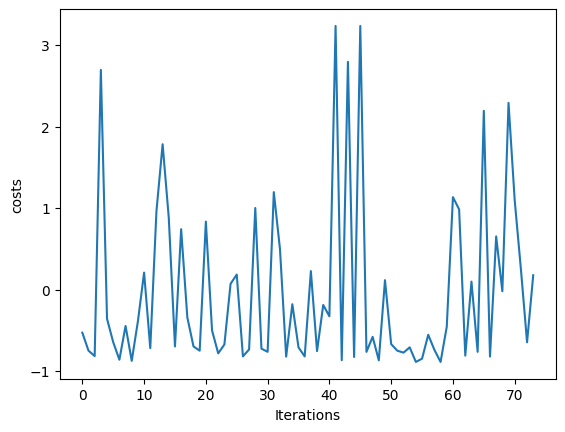

In [ ]:
def stochastic_gradient_descent(X,y, learning_rate, num_iterations):
  w = torch.randn(X.shape[1],1)
  costs = []
  for i in range(num_iterations):
    cost_total = 0
    for j in range(len(X)):
      rand_index = np.random.randint(len(X))
      X_j = X[rand_index].unsqueeze(0)
      y_j = y[rand_index].unsqueeze(0)
      cost, gradients = MSE_function(X_j,y_j,w)
      w -= learning_rate*gradients
      cost_total += cost
    costs.append(cost_total / len(X))
  return w, costs

#Visualisation :

weights2,costs=stochastic_gradient_descent(X_train,y_tr,0.01,100)

with torch.no_grad():
    y_pred = torch.mm(X_test, weights2)
    plt.plot(y_test.numpy())
    plt.xlabel('Iterations')
    plt.ylabel('costs')

    plt.show()

Pour essayer des différents pas , on a implémenté ce code :

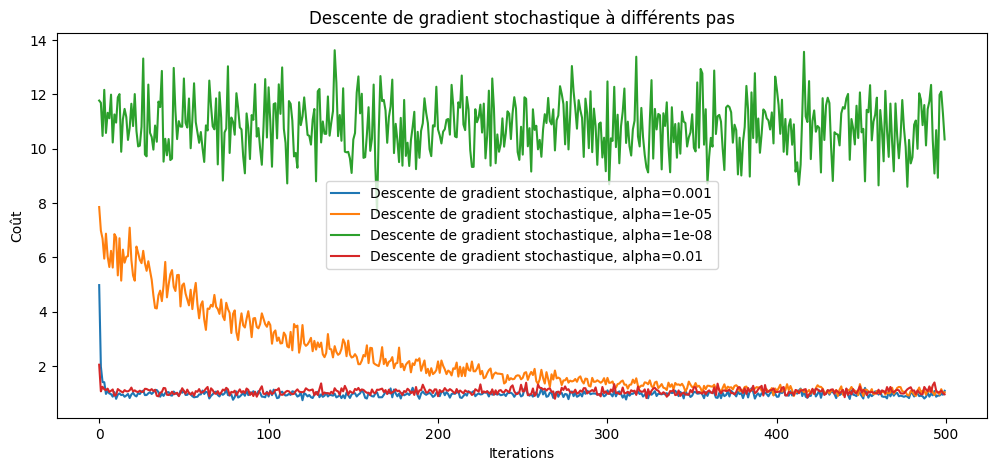

In [ ]:


# Fonction de coût MSE
def MSE_function(X,y,w):
    y_pred = torch.matmul(X,w)
    cost = torch.mean((y-y_pred)**2)
    gradients = -2*torch.matmul(torch.transpose(X,0,1),(y-y_pred))/len(y)
    return cost, gradients

# Descente de gradient stochastique à différents pas
def stochastic_gradient_descent(X,y, learning_rate, num_iterations):
    w = torch.randn(X.shape[1],1)
    costs = []
    for i in range(num_iterations):
        cost_total = 0
        for j in range(len(X)):
            rand_index = np.random.randint(len(X))
            X_j = X[rand_index].unsqueeze(0)
            y_j = y[rand_index].unsqueeze(0)
            cost, gradients = MSE_function(X_j,y_j,w)
            w -= learning_rate*gradients
            cost_total += cost
        costs.append(cost_total / len(X))
    return w, costs

# Données d'entraînement et de test
X_train = torch.randn(225,10)
y_train = torch.randn(225,1)
X_test = torch.randn(25,10)
y_test = torch.randn(25,1)

# Hyperparamètres
learning_rates = [0.001, 0.00001, 0.00000001, 0.01]
num_iterations = 500

# Descente de gradient stochastique à différents pas
fig, ax = plt.subplots(figsize=(12, 5))
for j in learning_rates:
    weights, costs = stochastic_gradient_descent(X_train, y_train, j, num_iterations)
    ax.plot(costs, label='Descente de gradient stochastique, alpha='+str(j))

# Mise en forme du graphique
ax.set_xlabel("Iterations")
ax.set_ylabel("Coût")
ax.set_title("Descente de gradient stochastique à différents pas")
plt.legend()
plt.show()